In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [35]:
specimen1 = pd.read_csv('specimen1.csv')
specimen2 = pd.read_csv('specimen2.csv')
specimen3 = pd.read_csv('specimen3.csv')

data = pd.read_csv('FEA-FPU50-tensile.csv') # FEA data

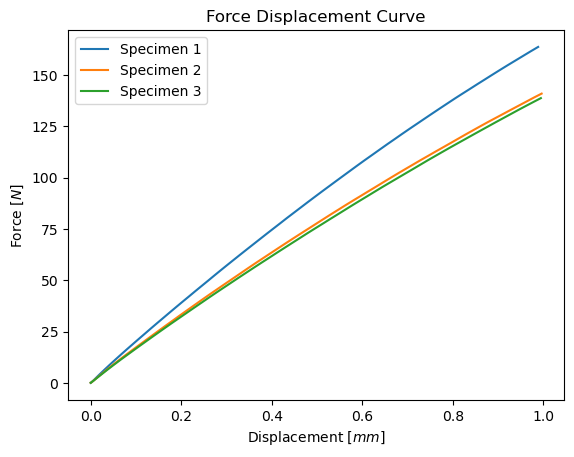

In [36]:
data1 = specimen1[specimen1['Displacement'] < 1]
plt.plot(data1['Displacement'], data1['Force'])

data2 = specimen2[specimen2['Displacement'] < 1]
plt.plot(data2['Displacement'], data2['Force'])

data3 = specimen3[specimen3['Displacement'] < 1]
plt.plot(data3['Displacement'], data3['Force'])

plt.title("Force Displacement Curve")
plt.xlabel("Displacement $[mm]$")
plt.ylabel("Force $[N]$")
plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'])

In [37]:
specimen_thickness = 3.4 # in mm
specimen_width = 6 # in mm
original_length = 65 # in mm

area = specimen_thickness * specimen_width


In [38]:
def stress_strain(force, displacement):
    area = specimen_thickness * specimen_width # cross sectional area of the specimen

    stress = force / area
    strain = displacement / 65 # change in length / original: Tensile test

    return stress, strain

stress1, strain1 = stress_strain(data1['Force'], data1['Displacement'])
stress2, strain2 = stress_strain(data2['Force'], data2['Displacement'])
stress3, strain3 = stress_strain(data3['Force'], data3['Displacement'])

np.size(strain1)

69

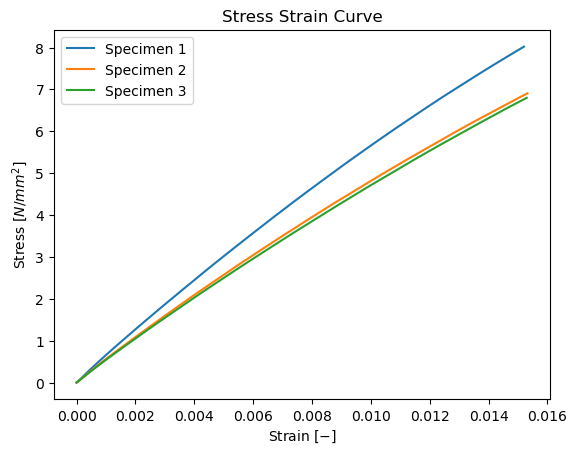

In [39]:
plt.plot(strain1, stress1)
plt.plot(strain2, stress2)
plt.plot(strain3, stress3)
plt.title("Stress Strain Curve")
plt.xlabel("Strain $[-]$")
plt.ylabel("Stress $[N/mm^2]$")
plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'])

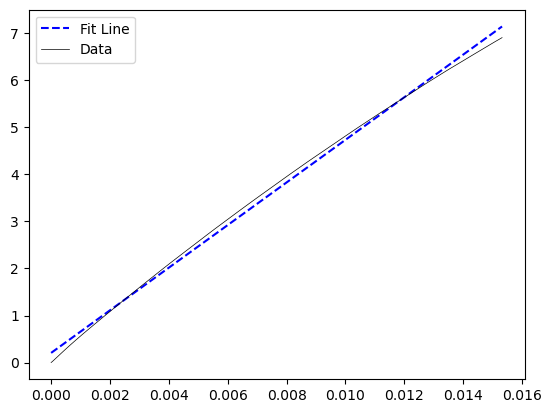

In [40]:
model = LinearRegression()

stress2 = np.array(stress2).reshape(-1, 1)
strain2= np.array(strain2).reshape(-1, 1)
model.fit(strain2, stress2[0:65])

fit_line_data = model.predict(strain2)
plt.plot(strain2, fit_line_data, 'b--', label = 'Fit Line')
# plt.plot(strain2, stress2)
plt.plot(strain2, stress2[0:65], 'k-', label = 'Data', linewidth = 0.5)
plt.legend()

In [41]:
# FEA data analysis

new_data = data[data['Displacement1'] < 1] # displacement less than 1 mm

new_force_data = new_data['Force1']
new_disp_data = new_data['Displacement1']

force_data = data['Force1']
disp_data = data['Displacement1']

new_data

,Unnamed: 0,Steps,Time [s],Directional Deformation (Min) [mm],[B] Force Reaction (X) [N],Displacement,Force,Displacement1,Force1,DispPLA,ForcePLA
0,1,1,0.0333,-0.3334,-161.17,0.3334,161.17,0.00000,0.000,0.00000,0.00
1,2,1,0.0667,-0.6668,-322.34,0.6668,322.34,0.33333,93.094,0.33333,373.98
2,3,1,0.1000,-1.0002,-483.51,1.0002,483.51,0.66667,183.560,0.66667,739.11


In [42]:
def stress_strain(force, displacement):
    area = specimen_thickness * specimen_width # cross sectional area of the specimen

    stress = force / area
    strain = displacement / 33 # change in length / original: FEA

    return stress, strain

stress, strain = stress_strain(new_force_data, new_disp_data)


stress_strain_data = {'Stress':stress, 'Strain': strain}
df = pd.DataFrame(stress_strain_data)
# df

area = specimen_thickness * specimen_width
Youngs_modulus_N = (df.iloc[-1]['Stress'] - df.iloc[0]['Stress']) / (df.iloc[-1]['Strain'] - df.iloc[0]['Strain'])

print("FEA: Young's Modulus (in MPa) = ", Youngs_modulus_N)
print("ASTM Type IV: Young's Modulus (in MPa) = ", model.coef_[0])


FEA: Young's Modulus (in MPa) =  445.4007141728997
ASTM Type IV: Young's Modulus (in MPa) =  [452.88145276]


In [43]:
# plt.plot(disp_data, force_data, label = 'FEA data')
# plt.plot(specimen2['Displacement'], specimen2['Force'], label = 'Specimen 2')
# plt.title("Force Displacement Curve - FPU50")
# plt.xlabel("Displacement $[mm]$")
# plt.ylabel("Force $[N]$")
# plt.legend()
# plt.show()


In [44]:
# df.to_csv('stress-strain-PA6-FEA.csv')